In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import cv2
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
train_path = r'/content/drive/MyDrive/final_gesture/train'
test_path = r'/content/drive/MyDrive/final_gesture/test'

In [ ]:

#train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=18,shuffle=True)
#test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=18, shuffle=True)


train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, validation_split=0.1)
train_batches = train_datagen.flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=18,shuffle=True, subset='training')
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=18, shuffle=True)
validation_batches = train_datagen.flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=18,shuffle=True, subset = 'validation')





Found 9481 images belonging to 36 classes.
Found 1439 images belonging to 36 classes.
Found 1049 images belonging to 36 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

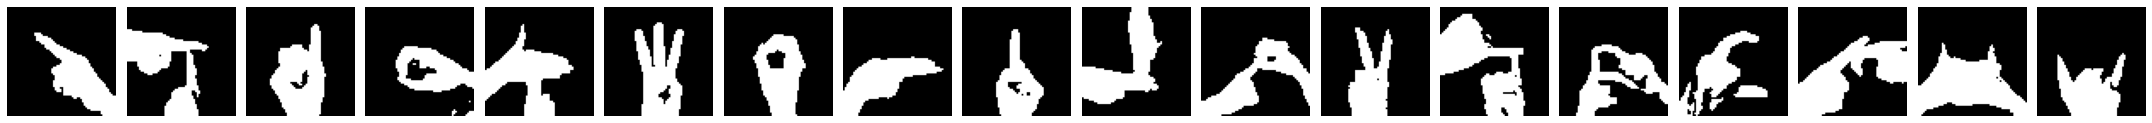

(18, 64, 64, 3)


In [ ]:
imgs, labels = next(train_batches)
#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 18, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(imgs.shape)
#print(labels)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation ="relu"))
model.add(Dropout(0.3))
model.add(Dense(36,activation ="softmax"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

In [ ]:
#METRICS = [keras.metrics.AUC(name='auc')]
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=METRICS)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')



model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [ ]:
history2 = model.fit(train_batches, epochs=25, callbacks=[reduce_lr, early_stop],  validation_data = validation_batches)

Epoch 1/25
527/527 [==============================] - 16s 31ms/step - loss: 0.4286 - accuracy: 0.8321 - val_loss: 0.4122 - val_accuracy: 0.8370
Epoch 2/25
527/527 [==============================] - 16s 31ms/step - loss: 0.4235 - accuracy: 0.8350 - val_loss: 0.4098 - val_accuracy: 0.8370
Epoch 3/25
527/527 [==============================] - 16s 30ms/step - loss: 0.4247 - accuracy: 0.8346 - val_loss: 0.4077 - val_accuracy: 0.8370
Epoch 4/25
527/527 [==============================] - 16s 30ms/step - loss: 0.4205 - accuracy: 0.8357 - val_loss: 0.4058 - val_accuracy: 0.8370
Epoch 5/25
527/527 [==============================] - 16s 30ms/step - loss: 0.4173 - accuracy: 0.8339 - val_loss: 0.4039 - val_accuracy: 0.8370
Epoch 6/25
527/527 [==============================] - 16s 30ms/step - loss: 0.4198 - accuracy: 0.8324 - val_loss: 0.4023 - val_accuracy: 0.8370
Epoch 7/25
527/527 [==============================] - 16s 30ms/step - loss: 0.4126 - accuracy: 0.8345 - val_loss: 0.4006 - val_accuracy:

In [ ]:
imgs, labels = next(test_batches) 
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')


loss of 0.7279691696166992; accuracy of 66.66666865348816%


In [ ]:
model.save('project.h5')

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
word_dict = {0:'zero',1:'one',2:'Two',3:'Three',4:'Four',5:'Five',6:'Six',7:'Seven',8:'Eight',9:'Nine',10:"A",11:"B",12:"C",13:"D",14:"E",15:"F",16:"G",17:"H",18:'I',19:'J',20:'K',21:'L',22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'U',31:'V',32:'W',33:'X',34:'Y',35:'Z'}





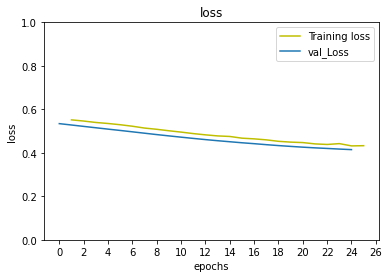

In [ ]:
import matplotlib.pyplot as plt
loss = history2.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(history2.history['val_loss'], label='val_Loss')
plt.title('loss')
plt.ylim([0,1])
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26])
#plt.yticks([0.5,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

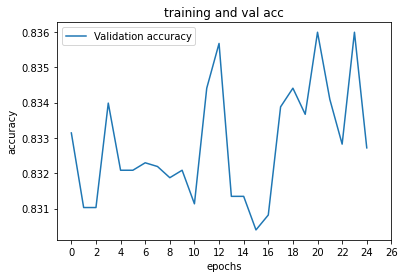

In [ ]:
import matplotlib.pyplot as plt

accuracy = history2.history['accuracy']
val_acc = history2.history['val_loss']
#plt.plot(epochs, accuracy, 'y', label='Training acc')
plt.plot(history2.history['accuracy'], label='Validation accuracy')
plt.title('training and val acc')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
history2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [ ]:
p2 = []
l2 = []
for i, pair in enumerate(test_batches) :
  if(i<len(test_batches)) :
    imags, labels = pair
    predictions = model.predict(imgs, verbose=0)
    for act, pred in zip(labels, predictions):
          pred = word_dict[np.argmax(pred)]
          p2.append(pred)
          act = word_dict[np.argmax(act)]
          l2.append(act)
  else : break


In [ ]:
rounded_predictions = np.argmax(predictions, axis=1)


In [ ]:
import numpy as np
rounded_labels=np.argmax(labels, axis=1)
rounded_labels

array([27, 21, 12,  1, 17, 34,  0,  1,  5,  5, 17, 15, 34, 30, 19, 29, 31,
       21])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
cm

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0,

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(20, 20))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)


Confusion matrix, without normalization


<Figure size 1440x1440 with 0 Axes>

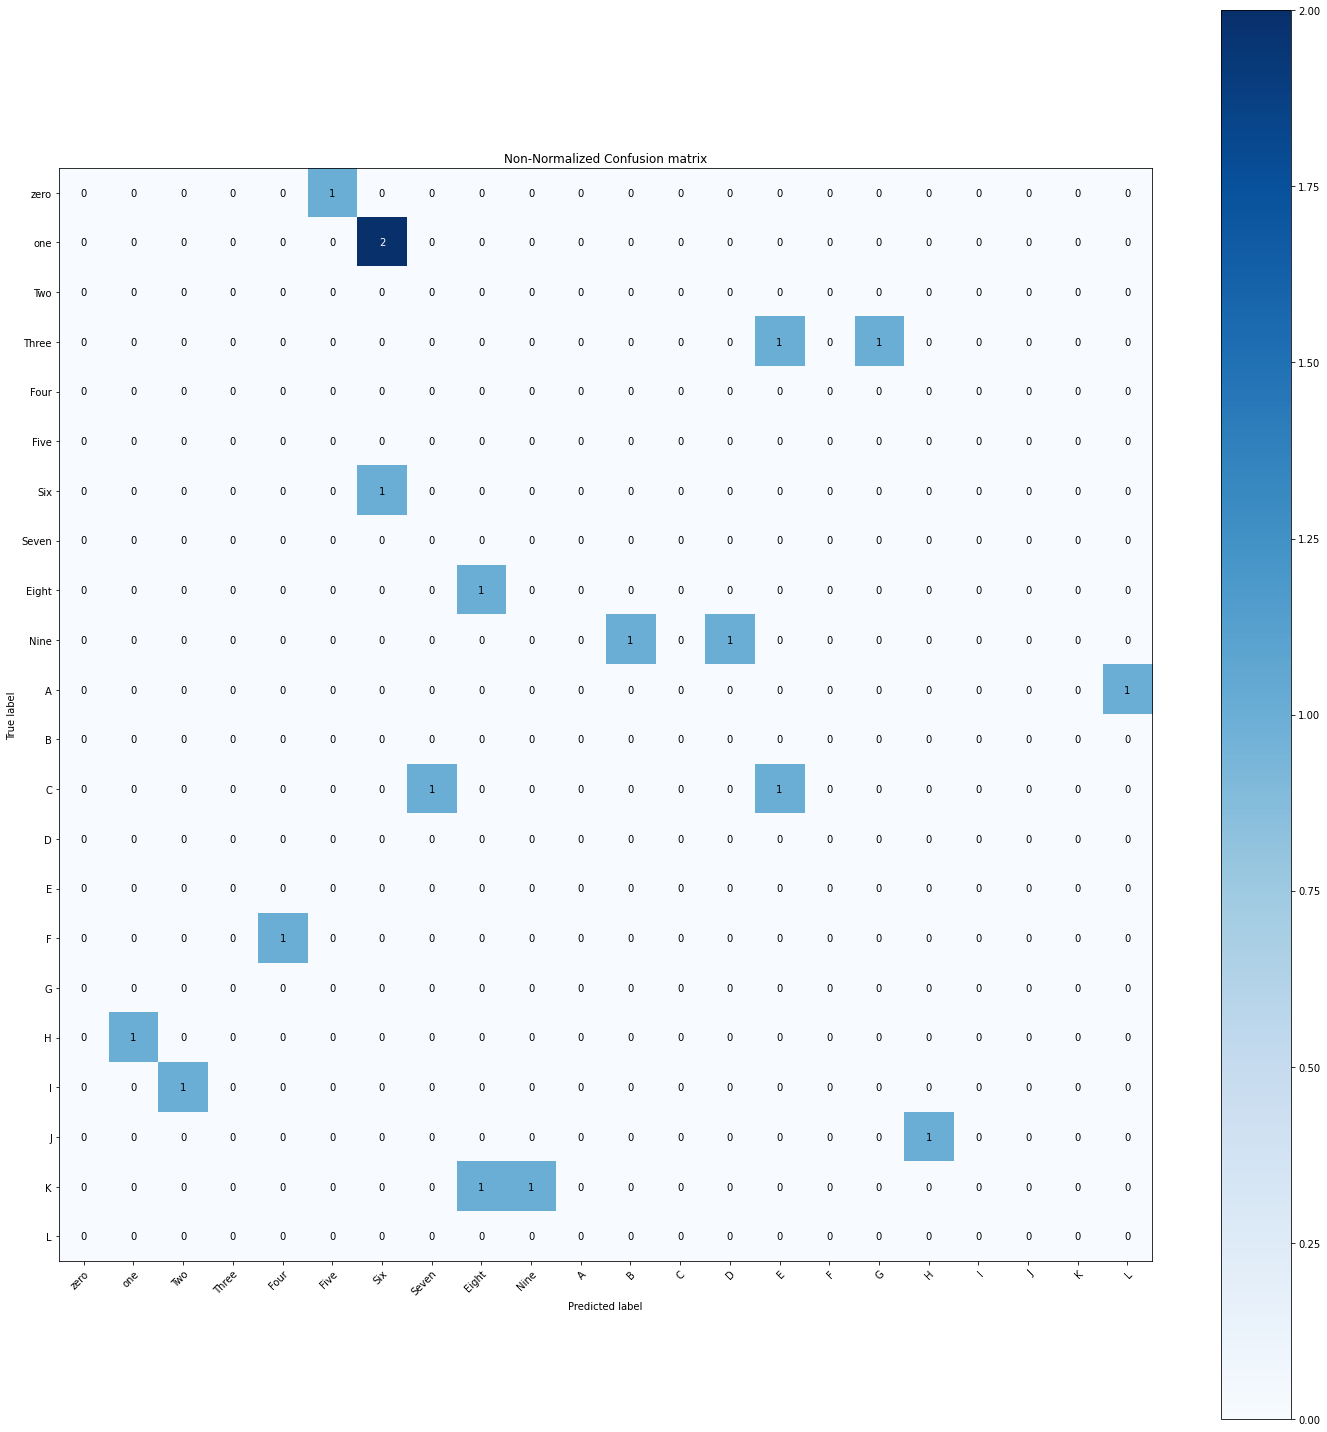

In [ ]:
class_names = ['zero','one','Two','Three','Four','Five','Six','Seven','Eight','Nine',"A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
plt.figure(figsize=(20,20))
plot_confusion_matrix(rounded_predictions, rounded_labels, classes = class_names, title='Non-Normalized Confusion matrix')
plt.show()



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

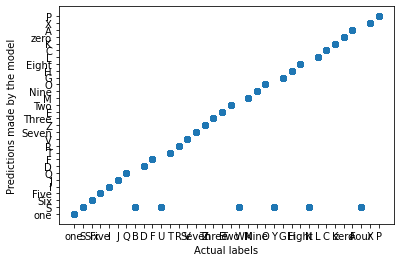

In [ ]:
p = []
l = []
word_dict = {0:'zero',1:'one',2:'Two',3:'Three',4:'Four',5:'Five',6:'Six',7:'Seven',8:'Eight',9:'Nine',10:"A",11:"B",12:"C",13:"D",14:"E",15:"F",16:"G",17:"H",18:'I',19:'J',20:'K',21:'L',22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'U',31:'V',32:'W',33:'X',34:'Y',35:'Z'}

for i, pair in enumerate(test_batches) :
  if(i<len(test_batches)) :
    imgs, labels = pair
    predictions = model.predict(imgs, verbose=0)
    for act, pred in zip(labels, predictions):
          pred = word_dict[np.argmax(pred)]
          p.append(pred)
          act = word_dict[np.argmax(act)]
          l.append(act)
  else : break
  
plt.scatter(l, p)
plt.xlabel("Actual labels")
plt.ylabel("Predictions made by the model")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(l, p, target_names=list(set(l)))
print(report)

              precision    recall  f1-score   support

           V       1.00      1.00      1.00        41
         Six       0.00      0.00      0.00        39
           T       1.00      1.00      1.00        40
           E       1.00      1.00      1.00        41
       Three       1.00      1.00      1.00        44
           X       1.00      1.00      1.00        43
           N       1.00      1.00      1.00        40
           H       1.00      1.00      1.00        38
           J       0.00      0.00      0.00        41
           D       1.00      1.00      1.00        39
           G       1.00      1.00      1.00        38
        Nine       1.00      1.00      1.00        39
           K       1.00      1.00      1.00        40
        zero       1.00      1.00      1.00        39
        Five       1.00      1.00      1.00        38
           S       1.00      1.00      1.00        41
           F       0.00      0.00      0.00        41
           C       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
